## Linear Regression

Tour task is to predict Median House Values in Californian Districts dataset (https://www.kaggle.com/datasets/camnugent/california-housing-prices), given a number of features from these districts.

In [1]:
# Necessary imports

import sklearn
import numpy as np
import os
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#### Fetching the Dataset

In [2]:
import os
import tarfile
import urllib.request

In [3]:
# download and extract a housing dataset from the dataset URL

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [4]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [5]:
fetch_housing_data()

In [6]:
# load the dataset 

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
# get dataframe information

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# only this column is categorical 

housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

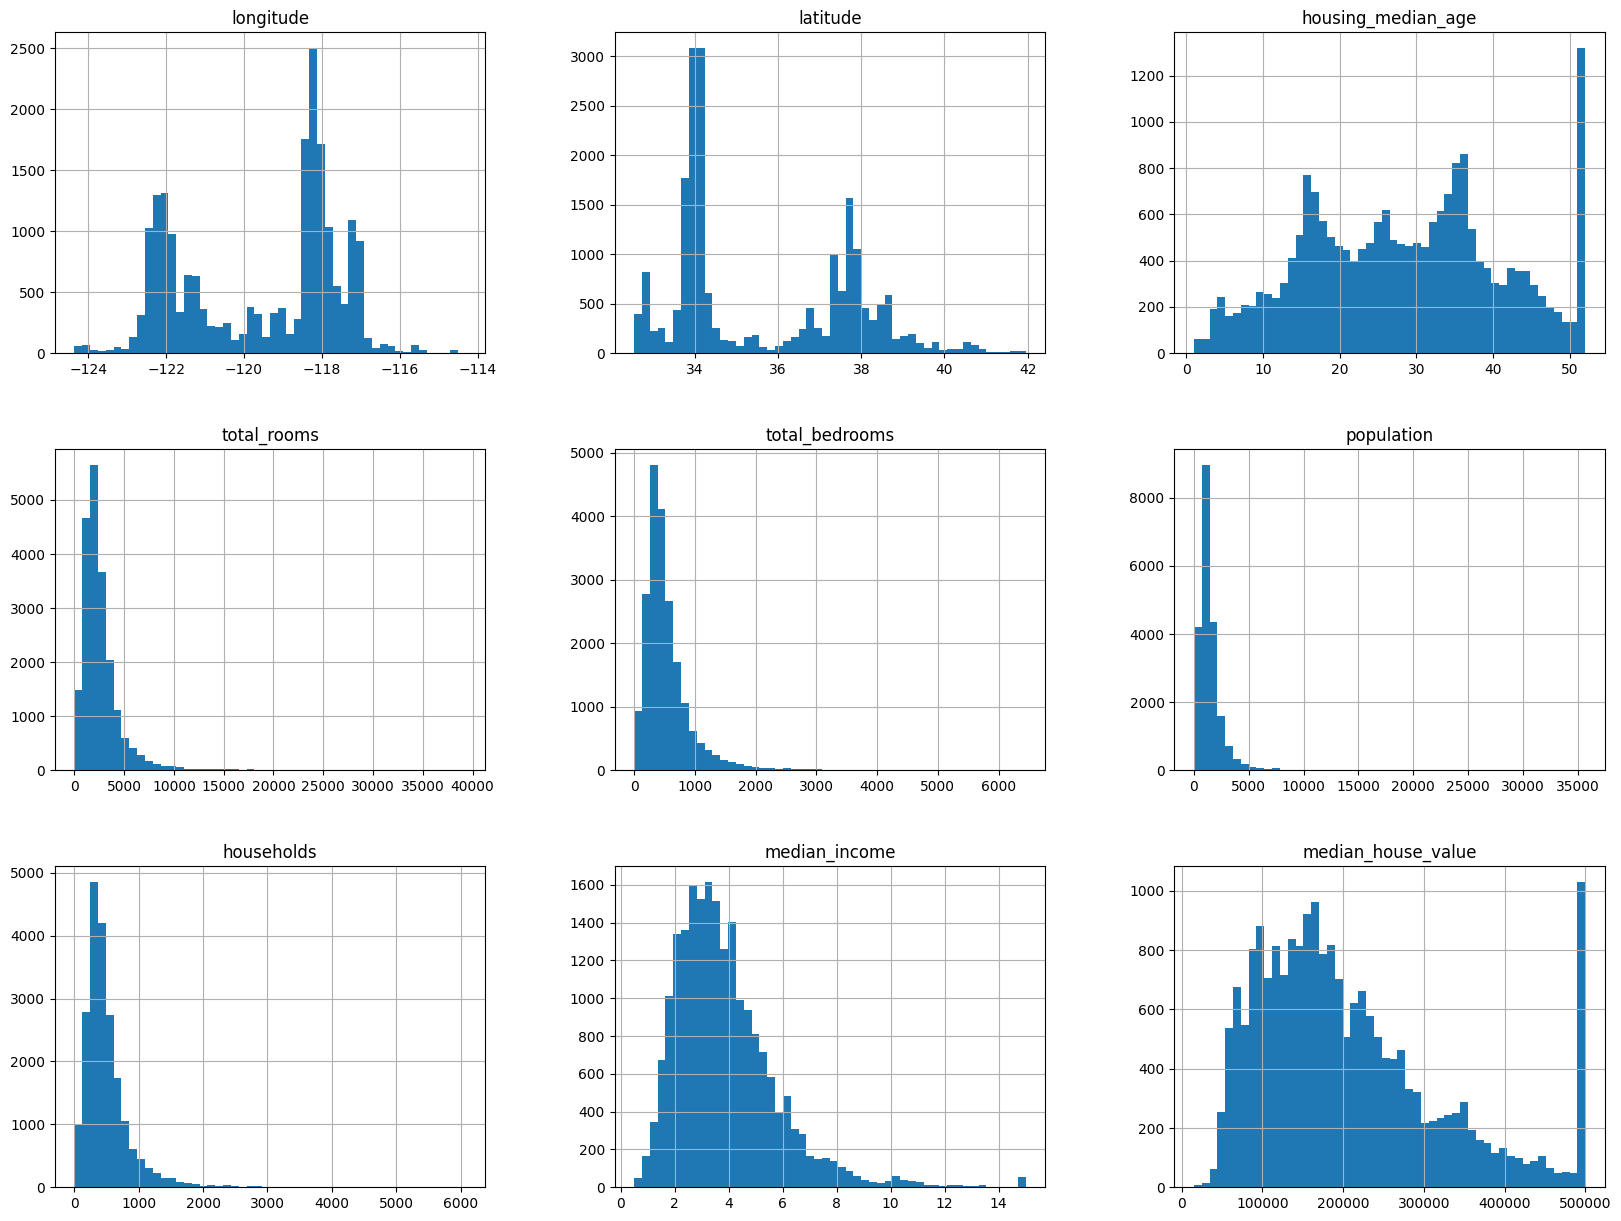

In [10]:
# housing.hist() generates histograms for all the numerical columns 

housing.hist(bins = 50, figsize = (20, 15))
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [12]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<Axes: >

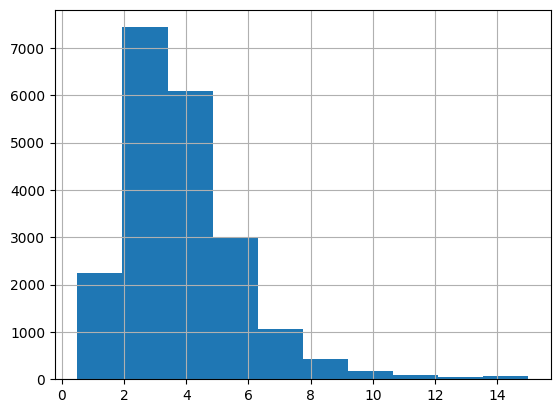

In [13]:
housing["median_income"].hist()

In [14]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels = [1, 2, 3, 4, 5])

In [15]:
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

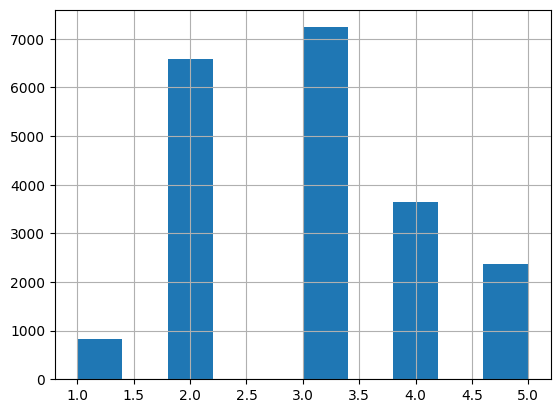

In [16]:
housing["income_cat"].hist()

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [18]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


In [19]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4


In [20]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [21]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

#### Discover and Viualize the Data to Gain Insights

In [22]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

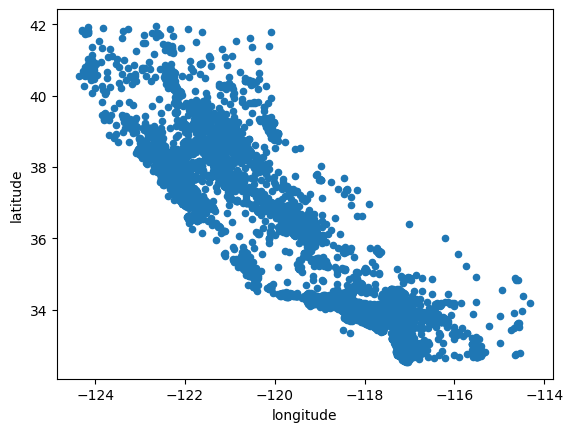

In [23]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude")

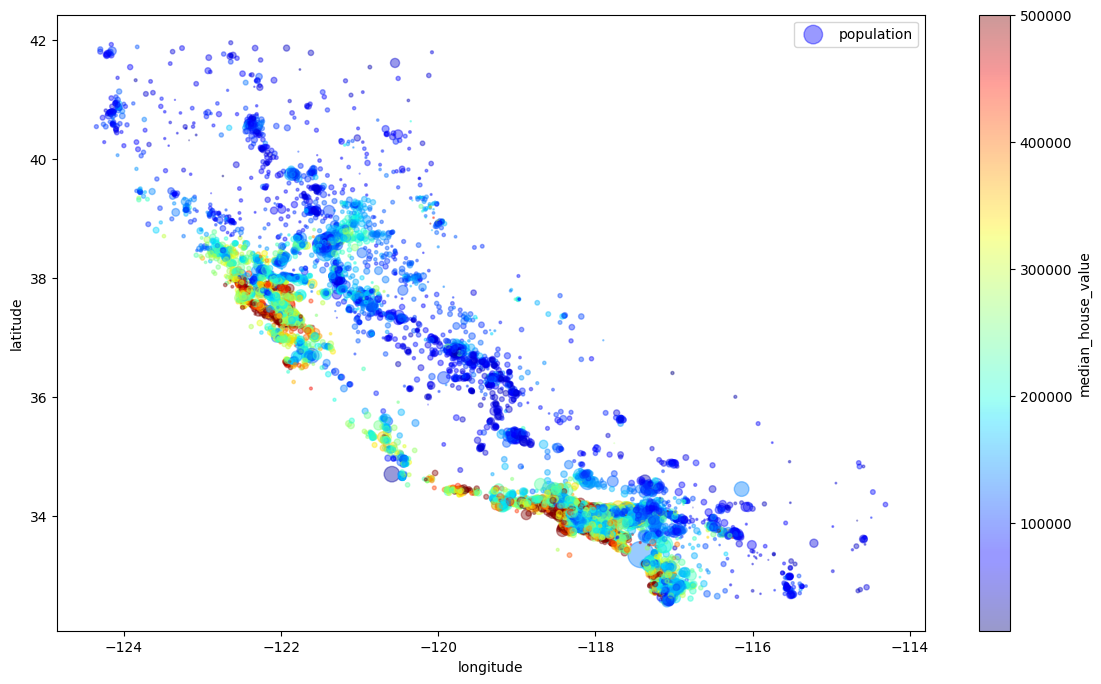

In [24]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
             s = housing["population"]/100, label = "population", figsize = (14, 8),
             c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True, sharex = False)
plt.legend()

# c: Sets the color of the data points based on the "median_house_value" column
# cmap: Sets the colormap to be used for coloring the points

In [ ]:
# Getting the correlation to measure the statistical relationship between the variables

corr_matrix = housing.corr()

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending = False)

#### Prepare the data for training

In [27]:
housing = strat_train_set.drop("median_house_value", axis = 1) # drop target/labels for training set

In [28]:
housing_labels = strat_train_set["median_house_value"].copy()

In [29]:
# Handling missing values 

sample_incomplete_rows = housing[housing.isnull().any(axis = 1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN,5


In [30]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace = True)

In [31]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN,5


#### Let's build a pipeline for preprocessing the numerical attributes

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [33]:
imputer = SimpleImputer(strategy = "median")

In [34]:
# Remove the text attribute because median can only be calculated on numerical attributes

housing_num = housing.drop("ocean_proximity", axis = 1)

In [35]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy = "median")),
        ('std_scaler', StandardScaler()),])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [36]:
housing_num_tr[0]

array([-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
        0.73260236,  0.55628602, -0.8936472 , -0.95468705])

#### Complete Pipeline: Handle Missing Values and Convert Categorial Data to One-Hot Encoding

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [38]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [39]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),])

In [40]:
housing_prepared = full_pipeline.fit_transform(housing)

In [41]:
housing_prepared[0]

array([-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
        0.73260236,  0.55628602, -0.8936472 , -0.95468705,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ])

In [42]:
housing_prepared.shape

(16512, 14)

##### Also apply same transformations to test set

In [43]:
housing_test = strat_test_set.drop("median_house_value", axis = 1) # drop labels for test set
housing_test = full_pipeline.transform(housing_test)

In [44]:
housing_test_labels = strat_test_set["median_house_value"].copy()
housing_test_labels

5241     500001.0
17352    162500.0
3505     204600.0
7777     159700.0
14155    184000.0
           ...   
12182    110000.0
7275     118800.0
17223    293800.0
10786    335700.0
3965     215600.0
Name: median_house_value, Length: 4128, dtype: float64

### Training the Model

##### Linear Regression: SKlearn Model

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [46]:
clf = LinearRegression()
clf.fit(housing_prepared, housing_labels)

LinearRegression()

In [47]:
predictions = clf.predict(housing_test)
predictions

array([416444.55142975, 294941.34070285, 242588.43973461, ...,
       316384.15327688, 273441.01552856, 238774.02107991])

##### Linear Regression Using one Dense Layer

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [52]:
model = keras.Sequential([
    layers.Dense(1)])

In [53]:
model.compile(optimizer = "sgd", loss = 'mean_absolute_error')

In [54]:
model.fit(housing_prepared, housing_labels, epochs = 20, validation_split = 0.2, batch_size = 32)

Epoch 1/20
413/413 [==============================] - 2s 3ms/step - loss: 206851.5781 - val_loss: 207602.2031
Epoch 2/20
413/413 [==============================] - 1s 3ms/step - loss: 206846.2969 - val_loss: 207596.8125
Epoch 3/20
413/413 [==============================] - 1s 3ms/step - loss: 206840.8125 - val_loss: 207591.2344
Epoch 4/20
413/413 [==============================] - 1s 2ms/step - loss: 206835.1719 - val_loss: 207585.8906
Epoch 5/20
413/413 [==============================] - 1s 2ms/step - loss: 206829.8281 - val_loss: 207580.3906
Epoch 6/20
413/413 [==============================] - 1s 2ms/step - loss: 206824.1562 - val_loss: 207574.9688
Epoch 7/20
413/413 [==============================] - 1s 3ms/step - loss: 206818.7031 - val_loss: 207569.5156
Epoch 8/20
413/413 [==============================] - 1s 3ms/step - loss: 206813.1562 - val_loss: 207564.0000
Epoch 9/20
413/413 [==============================] - 1s 2ms/step - loss: 206807.8281 - val_loss: 207558.5938
Epoch 10/2

In [55]:
model.evaluate(housing_test, housing_test_labels)

129/129 [==============================] - 0s 2ms/step - loss: 206147.9844


206147.984375

In [56]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [57]:
some_data_prepared = full_pipeline.transform(some_data)

In [58]:
print("Predictions:", model.predict(some_data_prepared))

1/1 [==============================] - 0s 191ms/step
Predictions: [[111.49852 ]
 [ 89.39548 ]
 [110.376656]
 [ 92.08234 ]
 [118.01836 ]]


In [59]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


Terrible results with simple model? Let us try something else.

##### Multi Layer Perceptron

In [60]:
model = keras.Sequential([
    layers.Dense(30, activation = "relu"),
    layers.Dense(1)])

In [61]:
model.compile(optimizer = "sgd", loss = 'mean_absolute_error')

In [62]:
model.fit(housing_prepared, housing_labels, epochs = 20, validation_split = 0.2, batch_size = 32)

Epoch 1/20
413/413 [==============================] - 3s 5ms/step - loss: 206473.0000 - val_loss: 204028.7188
Epoch 2/20
413/413 [==============================] - 1s 3ms/step - loss: 103579.9453 - val_loss: 50884.7539
Epoch 3/20
413/413 [==============================] - 1s 3ms/step - loss: 49423.1992 - val_loss: 48391.7227
Epoch 4/20
413/413 [==============================] - 1s 3ms/step - loss: 48020.3945 - val_loss: 47536.1953
Epoch 5/20
413/413 [==============================] - 1s 3ms/step - loss: 47355.7070 - val_loss: 47079.3633
Epoch 6/20
413/413 [==============================] - 1s 3ms/step - loss: 46814.5117 - val_loss: 46591.4375
Epoch 7/20
413/413 [==============================] - 2s 4ms/step - loss: 46423.1328 - val_loss: 46238.8164
Epoch 8/20
413/413 [==============================] - 1s 3ms/step - loss: 46070.7539 - val_loss: 46033.4805
Epoch 9/20
413/413 [==============================] - 1s 3ms/step - loss: 45829.2656 - val_loss: 46062.9375
Epoch 10/20
413/413 [====

In [63]:
model.evaluate(housing_test, housing_test_labels)

129/129 [==============================] - 0s 3ms/step - loss: 44007.8945


44007.89453125

In [64]:
print("Predictions:", model.predict(some_data_prepared))

1/1 [==============================] - 0s 98ms/step
Predictions: [[ 75654.94]
 [304305.84]
 [113607.84]
 [156152.52]
 [204590.4 ]]


In [65]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


Self Assessment Tasks

In [99]:
model = keras.Sequential([
    layers.Dense(10, activation = 'relu'),
    # layers.Dense(10, activation = "relu"),
    layers.Dense(1)])



optimizer = keras.optimizers.SGD(lr=0.01)

model.compile(optimizer = optimizer, loss = 'mean_absolute_error')

model.fit(housing_prepared, housing_labels, epochs = 20, validation_split = 0.2, batch_size = 32)

Epoch 1/20
413/413 [==============================] - 4s 7ms/step - loss: 206179.4062 - val_loss: 201242.6562
Epoch 2/20
413/413 [==============================] - 2s 4ms/step - loss: 93995.0625 - val_loss: 51067.5430
Epoch 3/20
413/413 [==============================] - 2s 4ms/step - loss: 49325.6797 - val_loss: 48272.7188
Epoch 4/20
413/413 [==============================] - 2s 4ms/step - loss: 48054.6016 - val_loss: 47543.2109
Epoch 5/20
413/413 [==============================] - 2s 5ms/step - loss: 47422.1406 - val_loss: 47426.8516
Epoch 6/20
413/413 [==============================] - 1s 3ms/step - loss: 46984.4180 - val_loss: 46819.2852
Epoch 7/20
413/413 [==============================] - 2s 4ms/step - loss: 46622.1562 - val_loss: 46562.1016
Epoch 8/20
413/413 [==============================] - 2s 4ms/step - loss: 46284.7070 - val_loss: 46343.6797
Epoch 9/20
413/413 [==============================] - 1s 3ms/step - loss: 45959.0508 - val_loss: 46225.2773
Epoch 10/20
413/413 [=====